<a href="https://colab.research.google.com/github/cyhsu/leaflet.timedimention.trajectory/blob/master/notebook/TxTrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TxTrack  
###  Texas HFR Particle Tracking  

This jupyter notebook is specific for how to use particle tracking tool offline.
To use this notebook, you can use google colab notebook by searching github account "cyhsu" to load this notebook.  

---

Brief Introduction to TxTrack.  
  

**Requirements:**
> Flask + Flask-compress   
> Xarray + SciPY + Dask + netCDF4 
> Numpy
>  

The TxTrack is entirely covered by python language. We use "Numpy", "Xarray", "SciPY", "Dask", "netCDF4", "Flask" and "Flask-compress". Mostly, if you have installed "Xarray", you don't need to install other packages to use TxTrack offline. However, if you want to use our visualization (online), you have to have both Flask and Flask-compress packages.    
  
  
  
**Three Components of TxTrack**
> 1. External Data Access  
> 2. Computing Kernel  
> 3. Web Visualization  
  
The first component is the external data access component. This component does not only allow us to pull the data from the THREDDS server directly from UCSD, but also allowing us to pull the data from the local directories where they exist. The second component is the computing kernel. The computing kernel computes the particle tracking by using a Lagrangian particle trajectory method. This kernel uses both python packages, Xarray and Dask, which provides us the capability in NetCDF of reading, interpolation, and parallel computing. The third component is the visualization component, which is the user-friendly interface page that is readable from any browser.  The component allows end-users to input the duration and location for the initial release position, and passes the information to the computing kernel, pulls the results from the kernel and presents it on the GIS map. The particles are continuously releasing at each time step at the initial location in the time loop, which supports the potential impact of the surface current field from the initial releasing position. You can try this on our test site at http://geo.gcoos.org:8012. The current version of the TxTrack can be regarded as the beta version, and it will be soon be integrated into GCOOS products. 


In [2]:
#--  This cell clone the entire github repository
!git clone https://github.com/cyhsu/leaflet.timedimention.trajectory.git

fatal: destination path 'leaflet.timedimention.trajectory' already exists and is not an empty directory.


In [0]:
#--  This cell is for python cartopy installation.
!apt-get install libproj-dev proj-data proj-bin -qq
!apt-get install libgeos-dev -qq
!pip install -q cython
!pip install -q cartopy

In [4]:
#--  This cell installs the requirements of this package.
%cd leaflet\.timedimention\.trajectory/
!pip install -r requirements.txt

/content/leaflet.timedimention.trajectory


In [0]:
#-- Import Python Packages.
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from src.api.fetch import fetch

In [12]:
#-- Setup the duration and initial location.
start_time = '2019-07-01'
end_time  = '2019-07-03'
init_lat, init_lon = 27.21, -96.88

cls = fetch(init_lon, init_lat,start_time,end_time)
json01 = cls.json()[0]
# print('\n',json01.keys())

			 Retrieve Dataset from UCSD HFRadar threddsURL

			 Load the entire dataset

 dict_keys(['type', 'geometry', 'properties'])


In [7]:
#-- Extract the particle location
lon,lat = np.squeeze(json01['geometry']['coordinates']).T
print(lat)

[27.21       27.21468999 27.21576721 27.21789983 27.22236307 27.22942984
 27.23847122 27.24696005 27.25455412 27.2610399  27.26846155 27.2760597
 27.28178154 27.28680982 27.29221566 27.29616712 27.29959685 27.30401228
 27.3101562  27.31629279 27.32118437 27.32530829 27.32816677 27.32999705
 27.33282766 27.33499868 27.33705026 27.34063004 27.34473867 27.35021589
 27.35570876 27.36068775 27.36530818 27.36959889 27.37116967 27.37141205
 27.37524451 27.38200946 27.3881128  27.38379728 27.37707123 27.3740608
 27.37670872 27.3776706  27.37844516 27.38036834 27.38139756 27.38246326
 27.38485236 27.38797884 27.39222959 27.39475831 27.39765625 27.40698657
 27.41934687 27.43178863 27.44326952 27.45237805 27.46495221 27.47847546
 27.4898776  27.49703429 27.50874609 27.52498715 27.53784321 27.55983766
 27.55993963 27.56692287 27.57850904 27.57850904 27.58627438 27.5928559 ]


/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


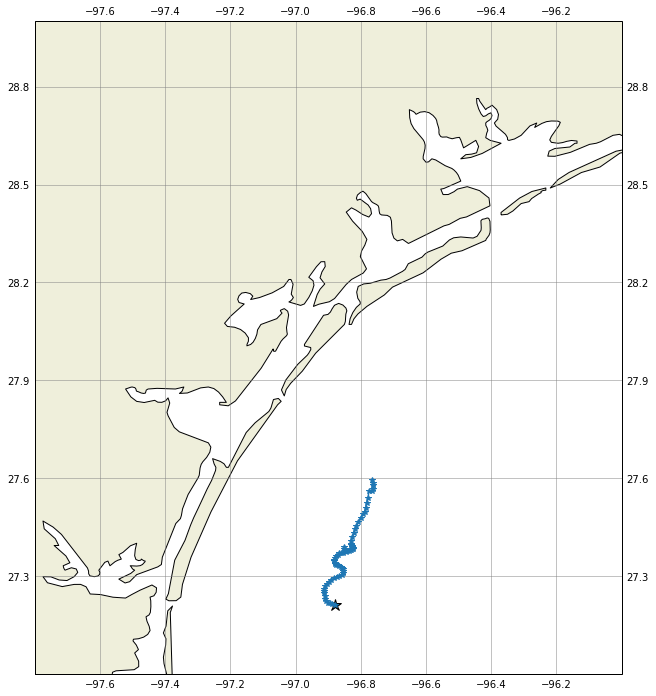

In [11]:
fig, axes = plt.subplots(ncols=1,nrows=1,
                         figsize=(15,12),
                         subplot_kw=dict(projection=ccrs.PlateCarree()))
axes.set_ylim([27.0,29.0]); axes.set_xlim([-97.8,-96.0])
axes.add_feature(cf.LAND.with_scale('10m'))
# axes.add_feature(cf.OCEAN.with_scale('50m'))  
axes.add_feature(cf.STATES.with_scale('10m'), 
                 linestyle='-',lw=1.0,edgecolor='white')  
axes.add_feature(cf.BORDERS.with_scale('10m'), 
                 linestyle='-',lw=2.5,edgecolor='white')  
axes.gridlines(color='gray',alpha=0.6,draw_labels=True) 
axes.coastlines(resolution='10m')

axes.plot(lon[0],lat[0],'k*',markersize=12)
axes.plot(lon,lat,'*-')
plt.show()